
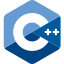
<br>

<div style="text-align:center; font-size:200%;">
  <b>Introduction to CMake</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Academy Munich</div>
<br/>
<!-- 01 Introduction to CMake.ipynb -->
<!-- slides/module_600_build/topic_100_cmake_intro.cpp -->


# What is CMake?

- Meta-Build-System
  - Generates build systems
- Test and installation support
- Platform independent
- Open Source


<img src="img/cmake-overview.png"
     style="display:block;margin:auto;width:50%"/>


<img src="img/cmake-workflow.png"
     style="display:block;margin:auto;width:90%"/>


## `CMakeLists.txt`

- Main file
- Describes the project
- Contains commands for CMake
- Defines the source directory


## The CMake Process

- Based on the `CMakeLists.txt` a build system is generated
- The build system is used to compile the project
- Typically, a directory for the build artifacts is created
- The build system is generated in this directory
- The build directory should be separate from the source directory
  ("out-of-source build")
- `CMakeCache.txt` in the build directory contains configuration information


## CMake Demo V0.1

```cmake
cmake_minimum_required(VERSION 3.27)
project(cmake_demo)

set(CMAKE_CXX_STANDARD 20)

add_executable(say_hello say_hello.cpp)
```


- `cmake_minimum_required(VERSION 3.27)` specifies the minimum CMake version
- `project(cmake_demo)` sets the project name
- `set(CMAKE_CXX_STANDARD 20)` sets the C++ standard
- `add_executable(say_hello say_hello.cpp)` adds an executable
  - `say_hello` is the name of the executable
  - `say_hello.cpp` is the source file


### Building the Project

```bash
mkdir build
cd build
cmake ..
cmake --build .
```


- CMake builds should be done in a separate directory
- `cmake ..` generates the build system
- `cmake --build .` compiles the project
- This allows us to use the same commands regardless of how we want to
  compile the project


- The `CMakeLists.txt` file defines how the project is compiled
- The first line specifies which CMake version is required
- In version 0.1 of the project, we specified version 3.27 or higher
- This is a relatively new version that may not be installed on your system
- CMake makes it easy to install the latest version locally without affecting
  the system
- For the example, in v0.2 the `CMakeLists.txt` file is changed so that only
  version 3.21 is required


- A CMake project can have multiple targets
- A target can be an executable, a library, or a custom rule
- With `cmake --build . --target <target>` we can compile a specific target

```bash
cmake --build . --target say_hello
```


### Multi-Config Generators

- Generate projects that support multiple configurations
- For example, Debug and Release
- Visual Studio and Xcode are multi-config generators
- You can select a configuration with `cmake --build . --config Release` or
  `Debug`


- How does CMake decide which build system to generate?
- This is determined by the selected generator
- Which generators are available depends on the platform
- We can find out with `cmake --help`
- With `cmake -G` we can specify the generator explicitly


### Building the Project with Ninja

If you have Ninja installed and are still in the `build` directory:

```bash
mkdir ../build-ninja
cd ../build-ninja
cmake -G "Ninja" ..
cmake --build .
```


### Commands in `CMakeLists.txt`

- `cmake_minimum_required(VERSION 3.21)` specifies the minimum CMake version
- `project(cmake_demo)` sets the project name
   - `VERSION` can be used to specify a version number
   - `LANGUAGES` can be used to specify the supported languages
- `set(CMAKE_CXX_STANDARD 20)` sets the C++ standard
  - This is an example of a variable being set
- `add_executable(say_hello say_hello.cpp)` adds an executable


## Version 0.3: Multiple Targets

- In this version, we added a second executable target
- Now we can choose between the targets with `cmake --build . --target <target>`
- By default, all targets are compiled


## Version 0.4: `TodoList` Class

- In this version, we added a `TodoList` class
- We added it directly to the `todo_list` executable
- This is not a good idea for several reasons
  - We cannot use the class in other targets
  - The `CMakeLists.txt` file becomes cluttered
  - We cannot test the class


## Version 0.5: Library

- In this version, we moved the `TodoList` class to a library
- We added the library to the `todo_list` executable
- Now we can use the library in other targets
- We made sure that we can link the library both statically and dynamically
- We can test this by setting the `BUILD_SHARED_LIBS` variable when generating
  the build system


```bash
cmake -DBUILD_SHARED_LIBS=ON .. # or OFF
cmake --build . --clean-first
```


On Windows, you can use the following command to find the dynamically linked
libraries:

```powershell
dumpbin.exe /DEPENDENTS .\Debug\todo_list.exe
```

On Linux

```bash
ldd ./todo_list
```


- In this version, we moved the source files to subdirectories
- With `add_subdirectory` we can add subdirectories
- With `target_include_directories` we can set the include paths for a target